In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

# EDA on Twitter dataset 
Hello and welcome to my Jupyter notebook.

What this does: given a `dataset_name`, saves to the `output_folder`. <u>This will overwrite the previous outputs</u>

Things to improve/play with (`# TODO`):
- **Improve/check the text tokenizer.** I haven't really checked if this works as expected. This affects: *wordclouds* (hashtags and tweet text), *topic extraction*
- **Improve the topic extraction.** I've used Latent Dirichlet Allocation (LDA) to extract topics. I haven't really played with the parameters yet. This affects: *topic extraction*
- **Include non-en tweets.** I've only included English tweets. This affects: *everything*
- **Include retweets.** I don't really know how retweets work in this dataset. This affects: *everything*

### Trying to understand the datasets:

Issues with data: some datasets are too large to be loaded (ira_tweets is 5.3 Gb), most data is not in english.

Description of datasts sorted by size (english tweets only):
- **catalonia_201906_1_tweets_csv_hashed**: Super small dataset on Catalonia's independence. Most tweets not in english.
- **bangladesh_linked_tweets_csv_hashed**: Bangladesh conflict, contains spam
- **iran_201906_3_tweets_csv_hashed**: Saudi Arabia, Trump, some brexit stuff
- **egypt_uae_082019_tweets_csv_hashed**: Qatar, Israel/Palestine conflict
- **iran_201901_1_tweets_csv_hashed_1**: Iran, Israel/Palestine conflict
- **ecuador_082019_tweets_csv_hashed**: mostly spam? maybe football stuff
- **iran_201901_1_tweets_csv_hashed_4**: Israel/Palestine
- **iranian_tweets_csv_hashed**: US/Iran conflict
- **china_082019_1_tweets_csv_hashed**: Mostly spam? Weird keywords
- **china_082019_2_tweets_csv_hashed**: Spam? Lot's of porn keywords
- **iran_201906_1_tweets_csv_hashed**: Intresting dataset! Spam, but also political stuff?
- **iran_201901_1_tweets_csv_hashed_2**: Also interesting. Same as above
- **iran_201901_1_tweets_csv_hashed_3**: Same as above
- **china_082019_3_tweets_csv_hashed_part1**: Spam mostly?
- **china_082019_3_tweets_csv_hashed_part3**: Same as above, lots of asking for retweet
- **iran_201906_2_tweets_csv_hashed**: Israel/Palestine conflict, contains arabic text tagged as english
- **china_082019_3_tweets_csv_hashed_part2**: A lot of tweets about recipes (?), muslim hate?
- **saudi_arabia_112019_tweets_csv_hashed_9**: Seems to be mostly spam
- **saudi_arabia_112019_tweets_csv_hashed_8**: Almost half of the tweets are retweets! also seems spam
- **saudi_arabia_112019_tweets_csv_hashed_3**: Lots of retweets, spam, maybe something about american news?
- **saudi_arabia_112019_tweets_csv_hashed_7**: Something about 1988 massacre, Iran and Yemen
- **saudi_arabia_112019_tweets_csv_hashed_5**: Mixed stuff
- **saudi_arabia_112019_tweets_csv_hashed_6**: "Trump warns iranian terrorists"
- **saudi_arabia_112019_tweets_csv_hashed_4**: Something about Crown Prince ? Lots of spam
- **saudi_arabia_112019_tweets_csv_hashed_2**: Same as above. Something about a prince
- **saudi_arabia_112019_tweets_csv_hashed_1**: A bit of everything... Game of thrones, the prince thing, erdogan...
- **ira_tweets_csv_hashed**: More american politics stuff: trump, obama...

### Set up variables

In [6]:
dataset_name = 'ira_tweets_csv_hashed'
output_folder = 'eda_output'
big_dataset = True # only necessary for ira_tweets_csv_hashed

## Loading the data

In [ ]:
os.makedirs(output_folder, exist_ok=True)

In [9]:
if not big_dataset:
    df = pd.read_csv(f'twitter_data/{dataset_name}.csv', low_memory=False)
else:
    df = pd.read_csv(f'twitter_data/{dataset_name}.csv', low_memory=False, chunksize=1000000)
    # remove all non-english tweets
    df = pd.concat([chunk[chunk['tweet_language'] == 'en'] for chunk in tqdm(df)])

df.head()

9it [02:01, 13.54s/it]


,tweetid,userid,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,follower_count,following_count,account_creation_date,...,latitude,longitude,quote_count,reply_count,like_count,retweet_count,hashtags,urls,user_mentions,poll_choices
8,567357519547207680,2b0d7525bed1df5119b7956f9be4888b45686172d68006...,2b0d7525bed1df5119b7956f9be4888b45686172d68006...,2b0d7525bed1df5119b7956f9be4888b45686172d68006...,California,Troublemaker,NaN,696,863,2013-08-06,...,absent,absent,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
10,493894187079974912,be1e8e099e93fe0964c1184173f038c7413def3baf38ef...,be1e8e099e93fe0964c1184173f038c7413def3baf38ef...,be1e8e099e93fe0964c1184173f038c7413def3baf38ef...,NY,NaN,NaN,103,218,2014-03-24,...,absent,absent,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
11,493688319902220288,be1e8e099e93fe0964c1184173f038c7413def3baf38ef...,be1e8e099e93fe0964c1184173f038c7413def3baf38ef...,be1e8e099e93fe0964c1184173f038c7413def3baf38ef...,NY,NaN,NaN,103,218,2014-03-24,...,absent,absent,0.0,0.0,0.0,0.0,[USA],NaN,NaN,NaN
12,497543470211678209,be1e8e099e93fe0964c1184173f038c7413def3baf38ef...,be1e8e099e93fe0964c1184173f038c7413def3baf38ef...,be1e8e099e93fe0964c1184173f038c7413def3baf38ef...,NY,NaN,NaN,103,218,2014-03-24,...,absent,absent,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
32,500956712657223680,004c1875a5f3a8ddfd2044b857a81c5d458882ac5cdf67...,004c1875a5f3a8ddfd2044b857a81c5d458882ac5cdf67...,004c1875a5f3a8ddfd2044b857a81c5d458882ac5cdf67...,New York,NaN,NaN,63,77,2014-05-23,...,absent,absent,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [10]:
# convert tweet_time and account_creation_date to datetime
df['tweet_time'] = pd.to_datetime(df['tweet_time'])
df['account_creation_date'] = pd.to_datetime(df['account_creation_date'])

## Language and Retweets

In [11]:
# show pie chart of tweet counts by language
if not big_dataset:
    df['tweet_language'].value_counts().plot.pie()
    plt.title(f'Language distribution of {dataset_name}')
    plt.tight_layout()
    plt.savefig(f'{output_folder}/{dataset_name}_language_pie.png')
    plt.show()

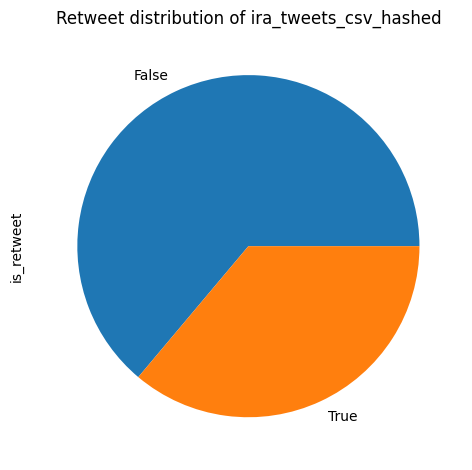

In [12]:
# show pie charts of retweet counts
df['is_retweet'].value_counts().plot.pie()
plt.title(f'Retweet distribution of {dataset_name}')
plt.tight_layout()
plt.show()

In [13]:
# TODO: See Introduction
df = df[df['tweet_language'] == 'en']
# haven't really explored retweets yet, so let's remove them for now
df = df[df['is_retweet'] == False]

## User profiles

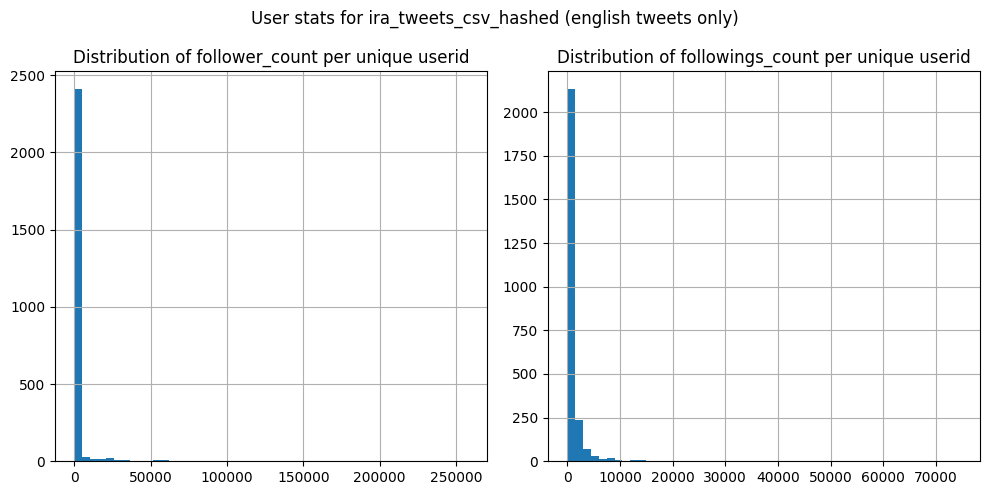

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
df.groupby('userid').follower_count.mean().hist(bins=50, ax=axes[0])
df.groupby('userid').following_count.mean().hist(bins=50, ax=axes[1])
axes[0].set_title('Distribution of follower_count per unique userid')
axes[1].set_title('Distribution of followings_count per unique userid')
fig.suptitle(f'User stats for {dataset_name} (english tweets only)')
plt.tight_layout()
plt.savefig(f'{output_folder}/{dataset_name}_user_stats.png')
plt.show()

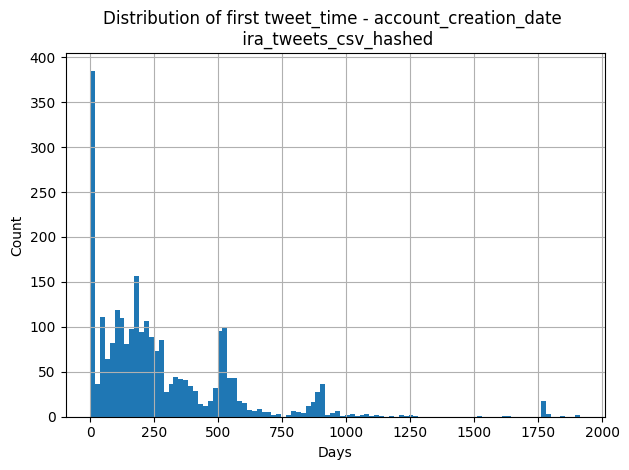

In [15]:
# show distribution of first tweet_time - account_creation_date
# group by userid and take the first tweet_time for each user

groupby_user = df.groupby('userid')
groupby_user.tweet_time.min().sub(groupby_user.account_creation_date.min(), axis=0).dt.days.hist(bins=100)
plt.title(f'Distribution of first tweet_time - account_creation_date \n {dataset_name}')
plt.xlabel('Days')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig(f'{output_folder}/{dataset_name}_first_tweet_time_account_creation_date.png')
plt.show()

## Word clouds

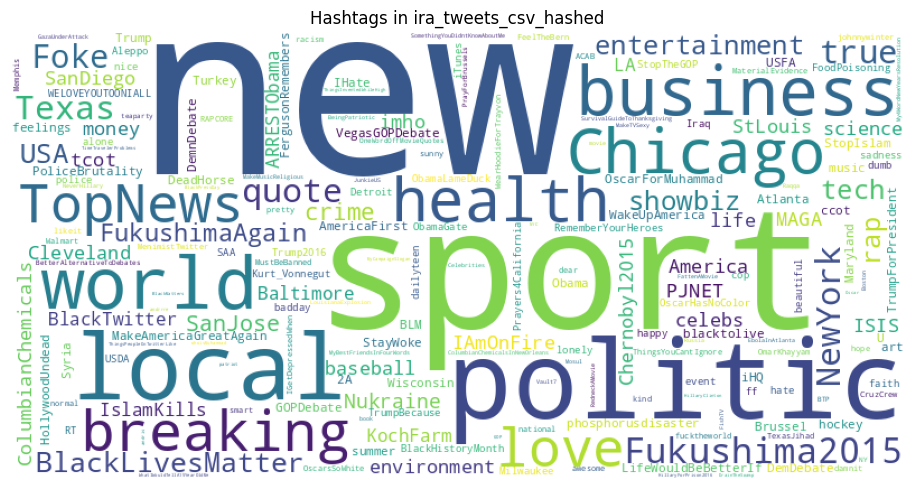

In [16]:
from wordcloud import WordCloud

hashtags = df['hashtags'].dropna().str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(hashtags)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.title(f'Hashtags in {dataset_name}')
plt.tight_layout()
plt.savefig(f'{output_folder}/{dataset_name}_hashtags.png')
plt.show()

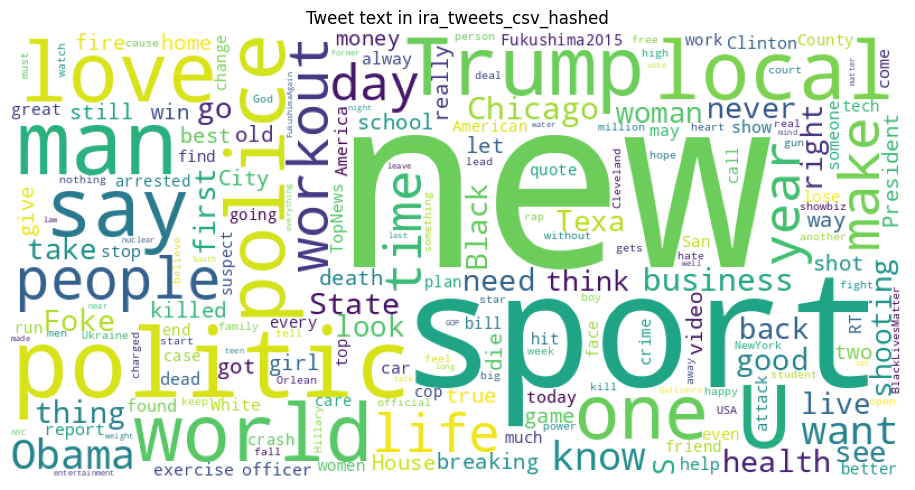

In [17]:
# do the same with tweet text, but remove stopwords
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer # TODO: See Introduction

stop_words = set(stopwords.words('english'))
stop_words.update(['https', 'co', 'amp', 't'])

# remove links and mentions
def remove_links_mentions(text):
    return ' '.join([w for w in text.split() if not w.startswith('http') and not w.startswith('@')])

def remove_stopwords(text):
    word_tokens = TweetTokenizer().tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return ' '.join(filtered_sentence)

df['tweet_text_no_stopwords'] = df['tweet_text'].apply(remove_links_mentions).apply(remove_stopwords)

wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(df['tweet_text_no_stopwords'].str.cat(sep=' '))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.title(f'Tweet text in {dataset_name}')
plt.tight_layout()
plt.savefig(f'{output_folder}/{dataset_name}_tweet_text.png')
plt.show()

## Random tweet samples
Note: this can crash for really small datasets

In [19]:
# print 10 random tweet_text
for t in df['tweet_text'].sample(10):
    print(t)
    print()

#ChristianTaylor #SandraBland #EricGarner #ZacharyHammond #BlackLivesMatter and the sad part is the list goes on #FergusonRemembers

can't you tell #smart

Two Women Steal Clothes, Strike Baby Stroller With Car During Getaway  #news

South Africa to hold local government elections on August 3  #world #news

Wanna see a real-life Barbie doll? This is not Photoshopped! You've gotta see this to believe it.

Some Republicans want to 'move on' from Flynn controversy https://t.co/PmWjvaDlTx

Super Bowl the final act of the NFL's worst season  #sports

https://t.co/9ThauDglDS trap goes!

Man charged with attempted murder of cops https://t.co/FFIPv7YSCv https://t.co/PQoVFjbcyT

Not everyone is your friend. Most things are better left unsaid. If people don't need to know, don't let your business become their business



In [20]:
# manually look at outliers
threshold = 1
outliers = df.groupby('userid').tweet_time.min().sub(df.groupby('userid').account_creation_date.min(), axis=0).dt.days > threshold
# sample tweet_text for outliers
for t in df[df['userid'].isin(outliers[outliers].index)]['tweet_text'].sample(10):
    print(t)
    print()

#IHate people make war #MenimistTwitter

Man killed at Rahway sneaker shop identified as 21-year-old employee

#politics Republicans agree with ... Elizabeth Warren?

Kidnapped Lancaster teen died of multiple gunshot wounds https://t.co/PPcdhIxDOO https://t.co/2q0BL5SlWA

How poor parents pay more for diapers  #politics

Maybe the children of a lesser God

Time crumbles things; everything grows old under the power of Time and is forgotten through the lapse of Time.

I'm seventeen and looking for a fight.

People who use religion as a reason for hate, judgement and violence  #MustBeBanned

She didn't watch 50 shades of grey #ReasonMyMomIsBetter



In [ ]:
# find all tweet_text_no_stopwords that contain 'http'
# df[df['tweet_text_no_stopwords'].str.contains('http')]['tweet_text_no_stopwords'].sample(10)

## Topic Extraction

In [18]:
df.shape[0] * 0.01

19143.14

In [ ]:
# Topic extraction with LDA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


# ignore words that are in less than 1% of tweets
min_df = int(df.shape[0] * 0.01)
cv = CountVectorizer(max_df=0.95, min_df=min_df, stop_words='english')
dtm = cv.fit_transform(df['tweet_text_no_stopwords'].dropna())

# fit LDA model
# TODO: see Introduction
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

# show metrics
if not big_dataset:
    print(f'Log likelihood: {lda.score(dtm)}')
    print(f'Perplexity: {lda.perplexity(dtm)}')


In [22]:
for idx, topic in enumerate(lda.components_):
    print(f'Top 7 words for topic #{idx}')
    print([cv.get_feature_names_out()[i] for i in topic.argsort()[-7:]])
    print()

Top 7 words for topic #0
['day', 'police', 'news', 'world', 'trump', 'local', 'love']

Top 7 words for topic #1
['day', 'need', 'good', 'health', 'life', 'workout', 'people']

Top 7 words for topic #2
['black', 'breaking', 'texas', 'year', 'business', 'time', 'sports']

Top 7 words for topic #3
['state', 'say', 'says', 'chicago', 'man', 'politics', 'news']

Top 7 words for topic #4
['woman', 'want', 'know', 'make', 'obama', 'like', 'new']



In [23]:
# give each topic a name with the 3 most common words

topic_names = [', '.join([cv.get_feature_names_out()[i] for i in topic.argsort()[-3:]]) for topic in lda.components_]
topic_names

['trump, local, love',
 'life, workout, people',
 'business, time, sports',
 'man, politics, news',
 'obama, like, new']

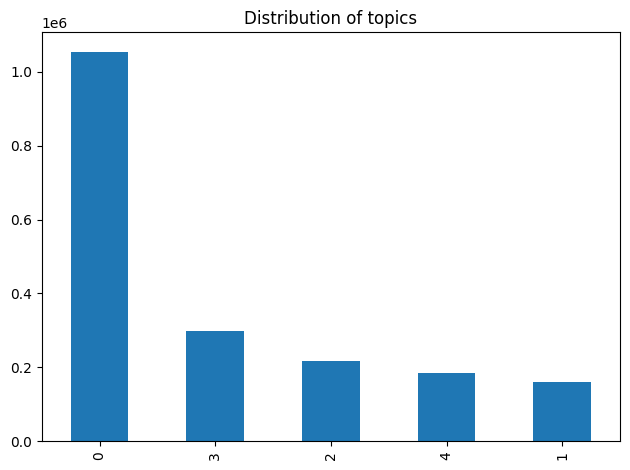

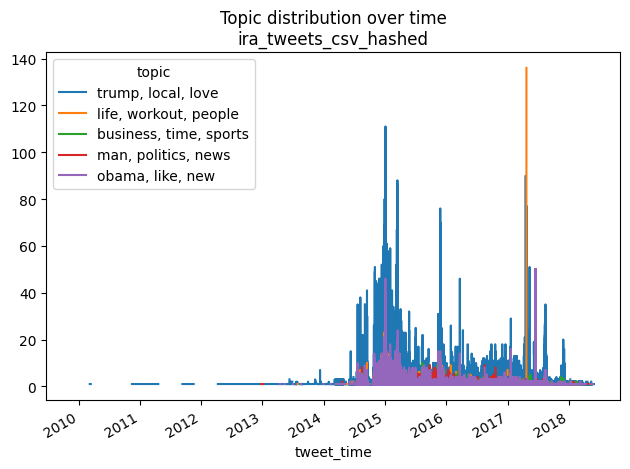

In [24]:
# show distribution of topics for each tweet
topic_results = lda.transform(dtm)
df['topic'] = topic_results.argmax(axis=1)
df['topic'].value_counts().plot.bar()
plt.title('Distribution of topics')
plt.tight_layout()
plt.show()

# show trend of topics over time
df.groupby('tweet_time').topic.value_counts().unstack().rename(columns=dict(zip(range(5), topic_names))).plot()
plt.title(f'Topic distribution over time\n{dataset_name}')
plt.tight_layout()
plt.savefig(f'{output_folder}/{dataset_name}_topic_distribution_over_time.png')
plt.show()
